# Exploratory Data Analysis

#### Investigating the relationships between features

The goal is to better understand the data at hand and determine which features will be best at prdicting length of stay at the hospital.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#### Import data

In [2]:
icd_LOS = pd.read_csv('icd_LOS.csv')
icd_LOS.drop(['Unnamed: 0'], axis=1, inplace=True)
icd_LOS.head()

,hadm_id,seq_num,icd_code,icd_version,LOS
0,22595853,1,5723,9,0.786111
1,22595853,2,78959,9,0.786111
2,22595853,3,5715,9,0.786111
3,22595853,4,07070,9,0.786111
4,22595853,5,496,9,0.786111


In [3]:
pat_ad = pd.read_csv('pat_ad.csv')

In [4]:
pat_ad.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
pat_ad.head()

,subject_id,hadm_id,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,ADMITTIME,DISCHTIME,LOS,gender,anchor_age,DOD,EDREGTIME,EDOUTTIME
0,10000032,22595853,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,2180-05-06 22:23:00,2180-05-07 17:15:00,0.786111,F,52,2180-09-09,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22841357,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2180-06-26 18:27:00,2180-06-27 18:49:00,1.015278,F,52,2180-09-09,2180-06-26 15:54:00,2180-06-26 21:31:00
2,10000032,25742920,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,0,2180-08-05 23:44:00,2180-08-07 17:50:00,1.754167,F,52,2180-09-09,2180-08-05 20:58:00,2180-08-06 01:44:00
3,10000032,29079034,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2180-07-23 12:35:00,2180-07-25 17:55:00,2.222222,F,52,2180-09-09,2180-07-23 05:54:00,2180-07-23 14:00:00
4,10000068,25022803,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,2160-03-03 23:16:00,2160-03-04 06:26:00,0.298611,F,19,NaN,2160-03-03 21:55:00,2160-03-04 06:26:00


In [6]:
icd_LOS = pd.read_csv('icd_LOS.csv')
icd_LOS.drop(['Unnamed: 0'], axis=1, inplace=True)
icd_LOS.head()

,hadm_id,seq_num,icd_code,icd_version,LOS
0,22595853,1,5723,9,0.786111
1,22595853,2,78959,9,0.786111
2,22595853,3,5715,9,0.786111
3,22595853,4,07070,9,0.786111
4,22595853,5,496,9,0.786111


In [7]:
pat_ad['LOS'].describe()

count    431089.000000
mean          4.484862
std           6.627251
min           0.000694
25%           1.071528
50%           2.738194
75%           5.243750
max         295.988194
Name: LOS, dtype: float64

In [8]:
icd_LOS['LOS'].describe()

count    4.755063e+06
mean     6.515793e+00
std      9.065197e+00
min      6.944444e-04
25%      1.881944e+00
50%      3.927083e+00
75%      7.615972e+00
max      2.959882e+02
Name: LOS, dtype: float64

Different means are observed between patient admissions length of stays and icd length of stays as there are repeat length of stay values/stay in the icd table as there are multiple diagnoses per stay on a case-by-case basis.

#### Patient admissions exploration - feature discovery

In [9]:
pat_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431089 entries, 0 to 431088
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            431089 non-null  int64  
 1   hadm_id               431089 non-null  int64  
 2   admission_type        431089 non-null  object 
 3   admit_provider_id     431085 non-null  object 
 4   admission_location    431089 non-null  object 
 5   discharge_location    312000 non-null  object 
 6   insurance             431089 non-null  object 
 7   language              431089 non-null  object 
 8   marital_status        421881 non-null  object 
 9   race                  431089 non-null  object 
 10  hospital_expire_flag  431089 non-null  int64  
 11  ADMITTIME             431089 non-null  object 
 12  DISCHTIME             431089 non-null  object 
 13  LOS                   431089 non-null  float64
 14  gender                431089 non-null  object 
 15  

In [10]:
# Convert edregtime and edouttime to datetime type
pat_ad['EDREGTIME'] = pd.to_datetime(pat_ad['EDREGTIME'])
pat_ad['EDOUTTIME'] = pd.to_datetime(pat_ad['EDOUTTIME'])
pat_ad['ADMITTIME'] = pd.to_datetime(pat_ad['ADMITTIME'])
pat_ad['DISCHTIME'] = pd.to_datetime(pat_ad['DISCHTIME'])
pat_ad['DOD'] = pd.to_datetime(pat_ad['DOD'])

In [11]:
pat_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431089 entries, 0 to 431088
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   subject_id            431089 non-null  int64         
 1   hadm_id               431089 non-null  int64         
 2   admission_type        431089 non-null  object        
 3   admit_provider_id     431085 non-null  object        
 4   admission_location    431089 non-null  object        
 5   discharge_location    312000 non-null  object        
 6   insurance             431089 non-null  object        
 7   language              431089 non-null  object        
 8   marital_status        421881 non-null  object        
 9   race                  431089 non-null  object        
 10  hospital_expire_flag  431089 non-null  int64         
 11  ADMITTIME             431089 non-null  datetime64[ns]
 12  DISCHTIME             431089 non-null  datetime64[ns]
 13 

In [12]:
pat_ad.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,431089.0,1.500775e+07,2.877490e+06,1.000003e+07,1.251584e+07,1.501288e+07,1.749628e+07,1.999999e+07
hadm_id,431089.0,2.500321e+07,2.888120e+06,2.000002e+07,2.250184e+07,2.500675e+07,2.750462e+07,2.999993e+07
hospital_expire_flag,431089.0,1.980334e-02,1.393241e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
LOS,431089.0,4.484862e+00,6.627251e+00,6.944444e-04,1.071528e+00,2.738194e+00,5.243750e+00,2.959882e+02
anchor_age,431089.0,5.687558e+01,1.905081e+01,1.800000e+01,4.300000e+01,5.800000e+01,7.200000e+01,9.100000e+01


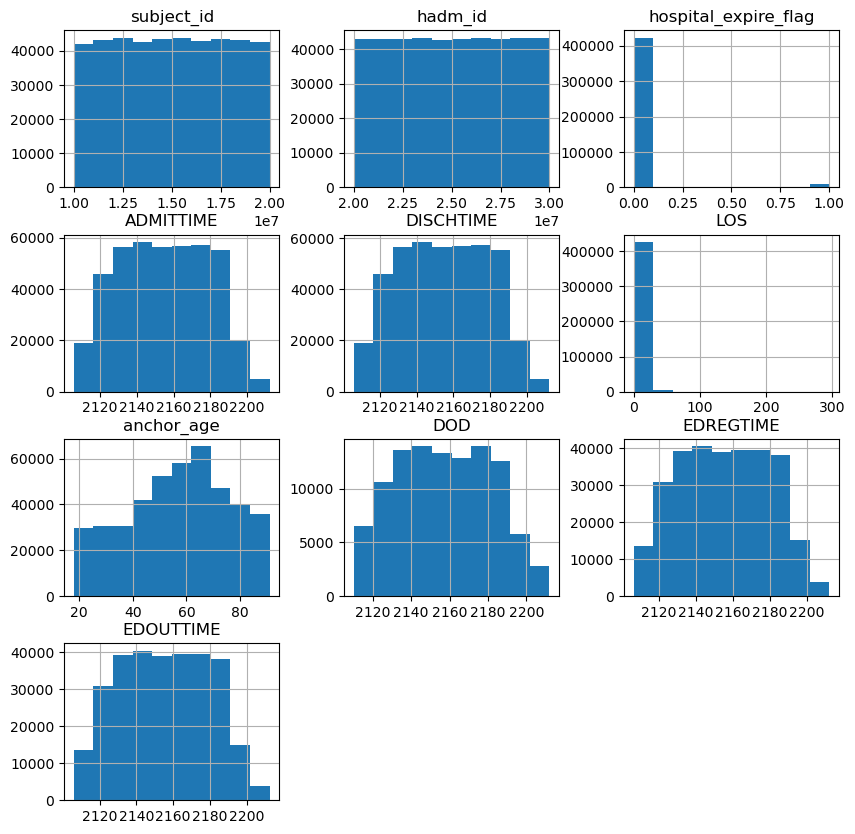

In [13]:
hist = pat_ad.hist(bins=10,figsize =(10,10))

In [14]:
#select categorical variables only
df_cat = pat_ad.select_dtypes(include = ['object', 'float64']).copy()
#get counts of each variable value
gender_counts = df_cat.gender.value_counts()
admit_provider_id_counts = df_cat.admit_provider_id.value_counts()
admission_location_counts = df_cat.admission_location.value_counts()
discharge_location_counts = df_cat.discharge_location.value_counts()
insurance_counts = df_cat.insurance.value_counts()
language_counts = df_cat.language.value_counts()
marital_status_counts = df_cat.marital_status.value_counts()
race_counts = df_cat.race.value_counts();

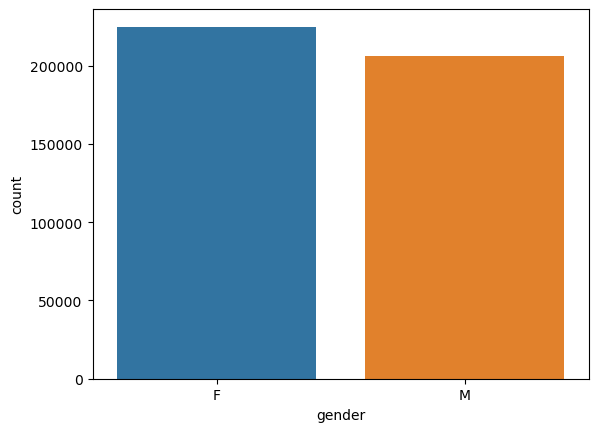

In [15]:
#count plot for one variable
sns.countplot(data = df_cat, x = 'gender');

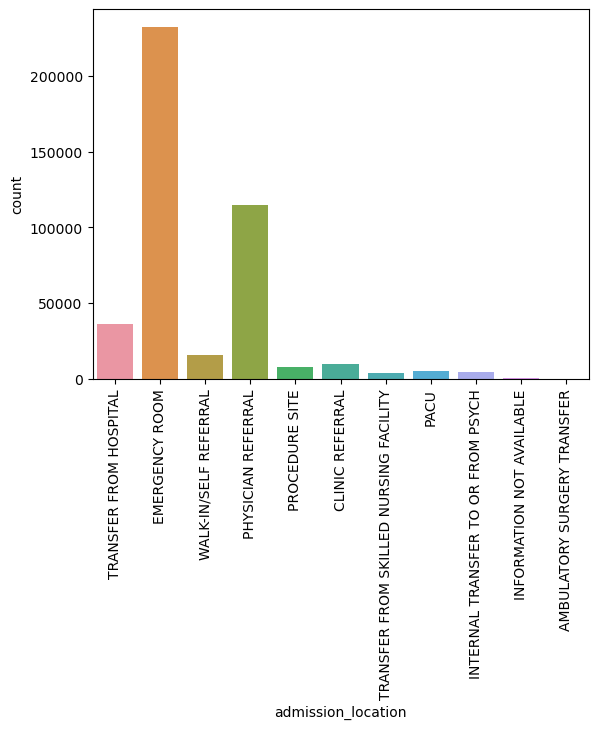

In [16]:
sns.countplot(data = df_cat, x = 'admission_location')
plt.xticks(rotation=90);

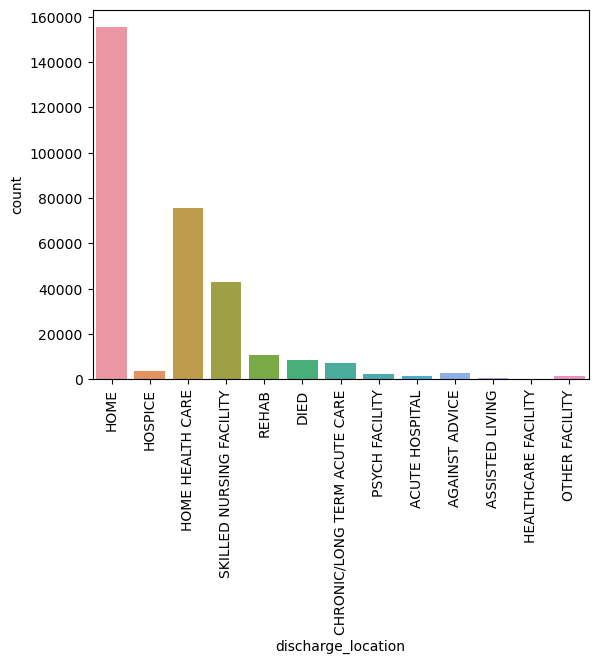

In [17]:
sns.countplot(data = df_cat, x = 'discharge_location')
plt.xticks(rotation=90);

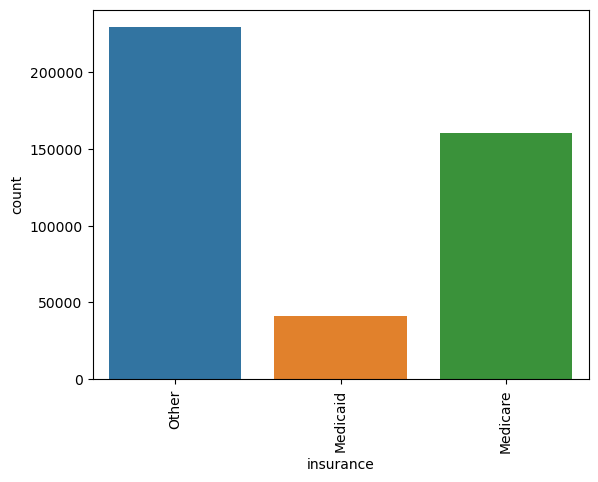

In [18]:
sns.countplot(data = df_cat, x = 'insurance')
plt.xticks(rotation=90);

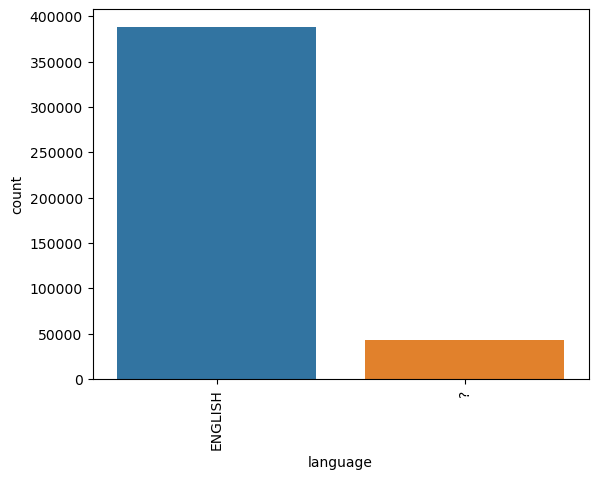

In [19]:
sns.countplot(data = df_cat, x = 'language')
plt.xticks(rotation=90);

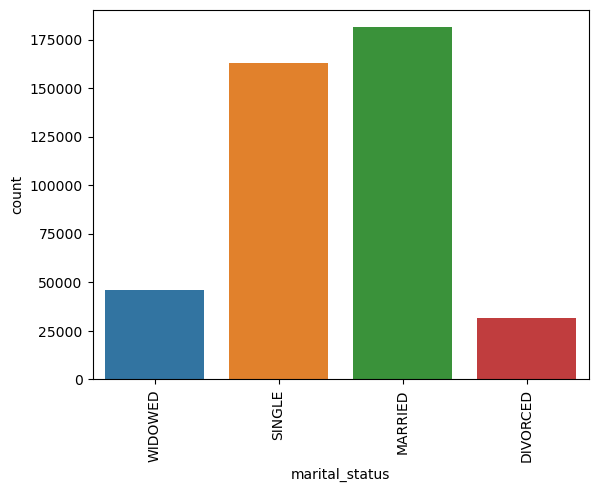

In [20]:
sns.countplot(data = df_cat, x = 'marital_status')
plt.xticks(rotation=90);

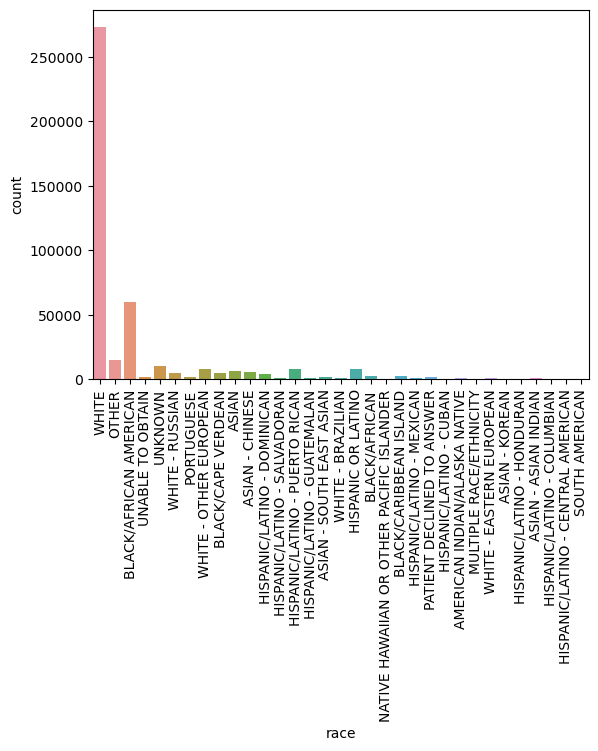

In [21]:
sns.countplot(data = df_cat, x = 'race')
plt.xticks(rotation=90);

In [22]:
df_cat.head()

,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,LOS,gender
0,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0.786111,F
1,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,1.015278,F
2,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,1.754167,F
3,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2.222222,F
4,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0.298611,F


##### Categories vs LOS

In [23]:
df_cat['LOS'].describe()

count    431089.000000
mean          4.484862
std           6.627251
min           0.000694
25%           1.071528
50%           2.738194
75%           5.243750
max         295.988194
Name: LOS, dtype: float64

Visualize each category against LOS to look for relationships.

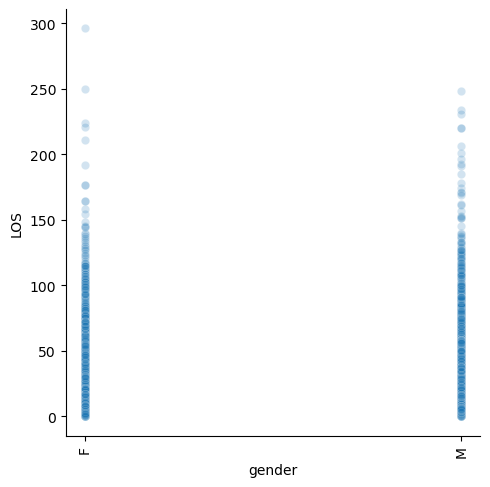

In [24]:
sns.relplot(data=df_cat, x="gender", y="LOS", kind="scatter", alpha=0.2)
plt.xticks(rotation=90);

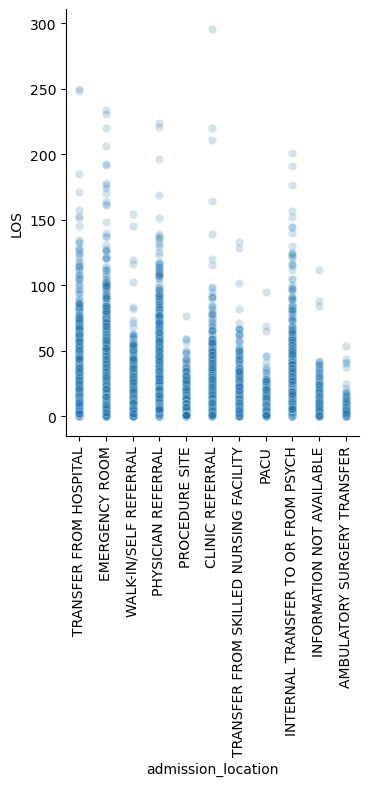

In [25]:
sns.relplot(data=df_cat, x="admission_location", y="LOS", kind="scatter", alpha=0.2)
plt.xticks(rotation=90);

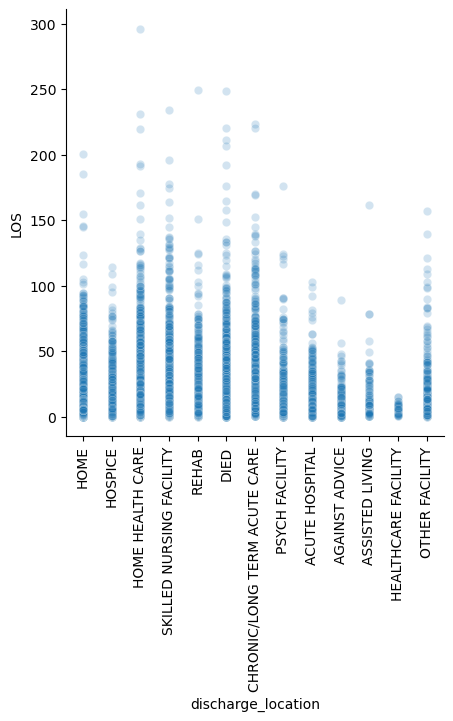

In [26]:
sns.relplot(data=df_cat, x="discharge_location", y="LOS", kind="scatter", alpha=0.2)
plt.xticks(rotation=90);

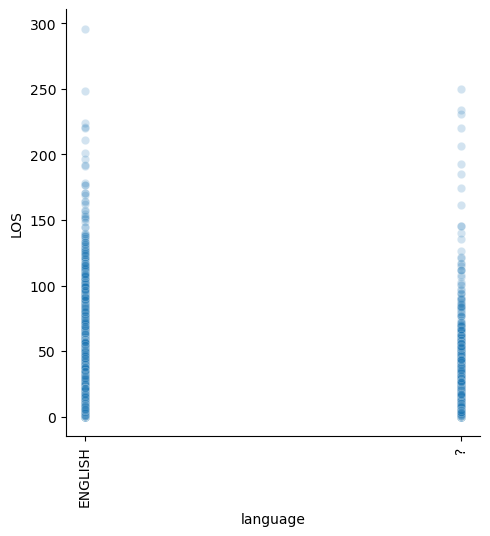

In [27]:
sns.relplot(data=df_cat, x="language", y="LOS", kind="scatter", alpha=0.2)
plt.xticks(rotation=90);

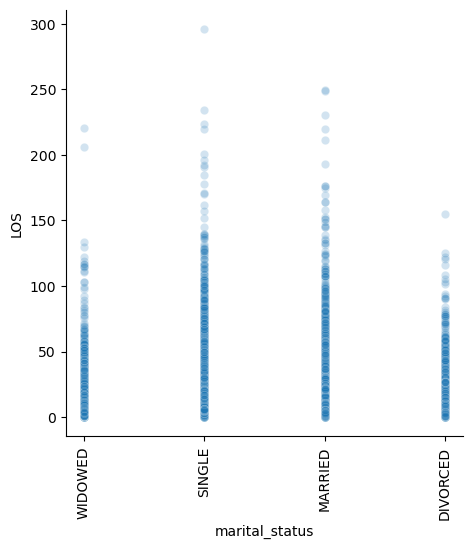

In [28]:
sns.relplot(data=df_cat, x="marital_status", y="LOS", kind="scatter", alpha=0.2)
plt.xticks(rotation=90);

In [87]:
# Bar plot function
def plot_los_groupby(variable, size=(20,10)):
    ''' 
    Plot Median LOS by df categorical series name 
    '''
    results = pat_ad[[variable, 'LOS']].groupby(variable).median().reset_index()
    values = list(results['LOS'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.9)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Median Length of Stay (days)')
    ax.tick_params(left=False, top=False, right=False, labelsize=10) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.tight_layout()
    plt.show();
    
# Boxplot function
def boxplot_los_groupby(variable, los_range=(-1, 30), size=(10,6)):
    ''' 
    Boxplot of LOS by df categorical series name 
    '''
    results = pat_ad[[variable, 'LOS']].groupby(variable).median().reset_index()

    categories = results[variable].values.tolist()

    hist_data = []
    for cat in categories:
        hist_data.append(pat_ad['LOS'].loc[pat_ad[variable]==cat].values)

    _, ax = plt.subplots(figsize=size)
    ax.boxplot(hist_data, 0, '', vert=False)
    ax.set_xlim(los_range)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Length of Stay (days)')
    ax.tick_params(left=False, right=False) 
    ax.set_title('Comparison of {} categories'.format(variable))
    plt.tight_layout()
    plt.show();

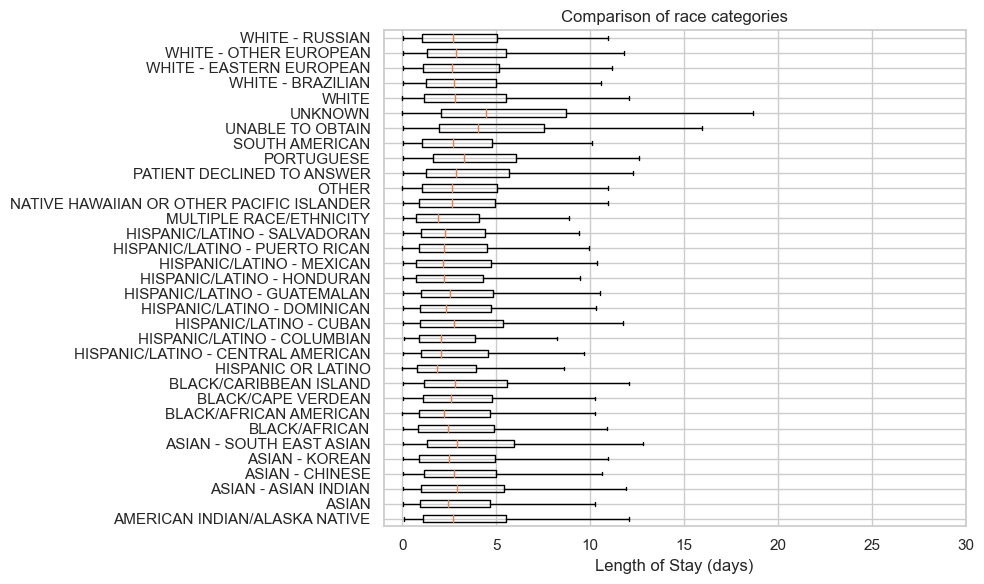

In [75]:
boxplot_los_groupby('race', los_range=(-1, 30))

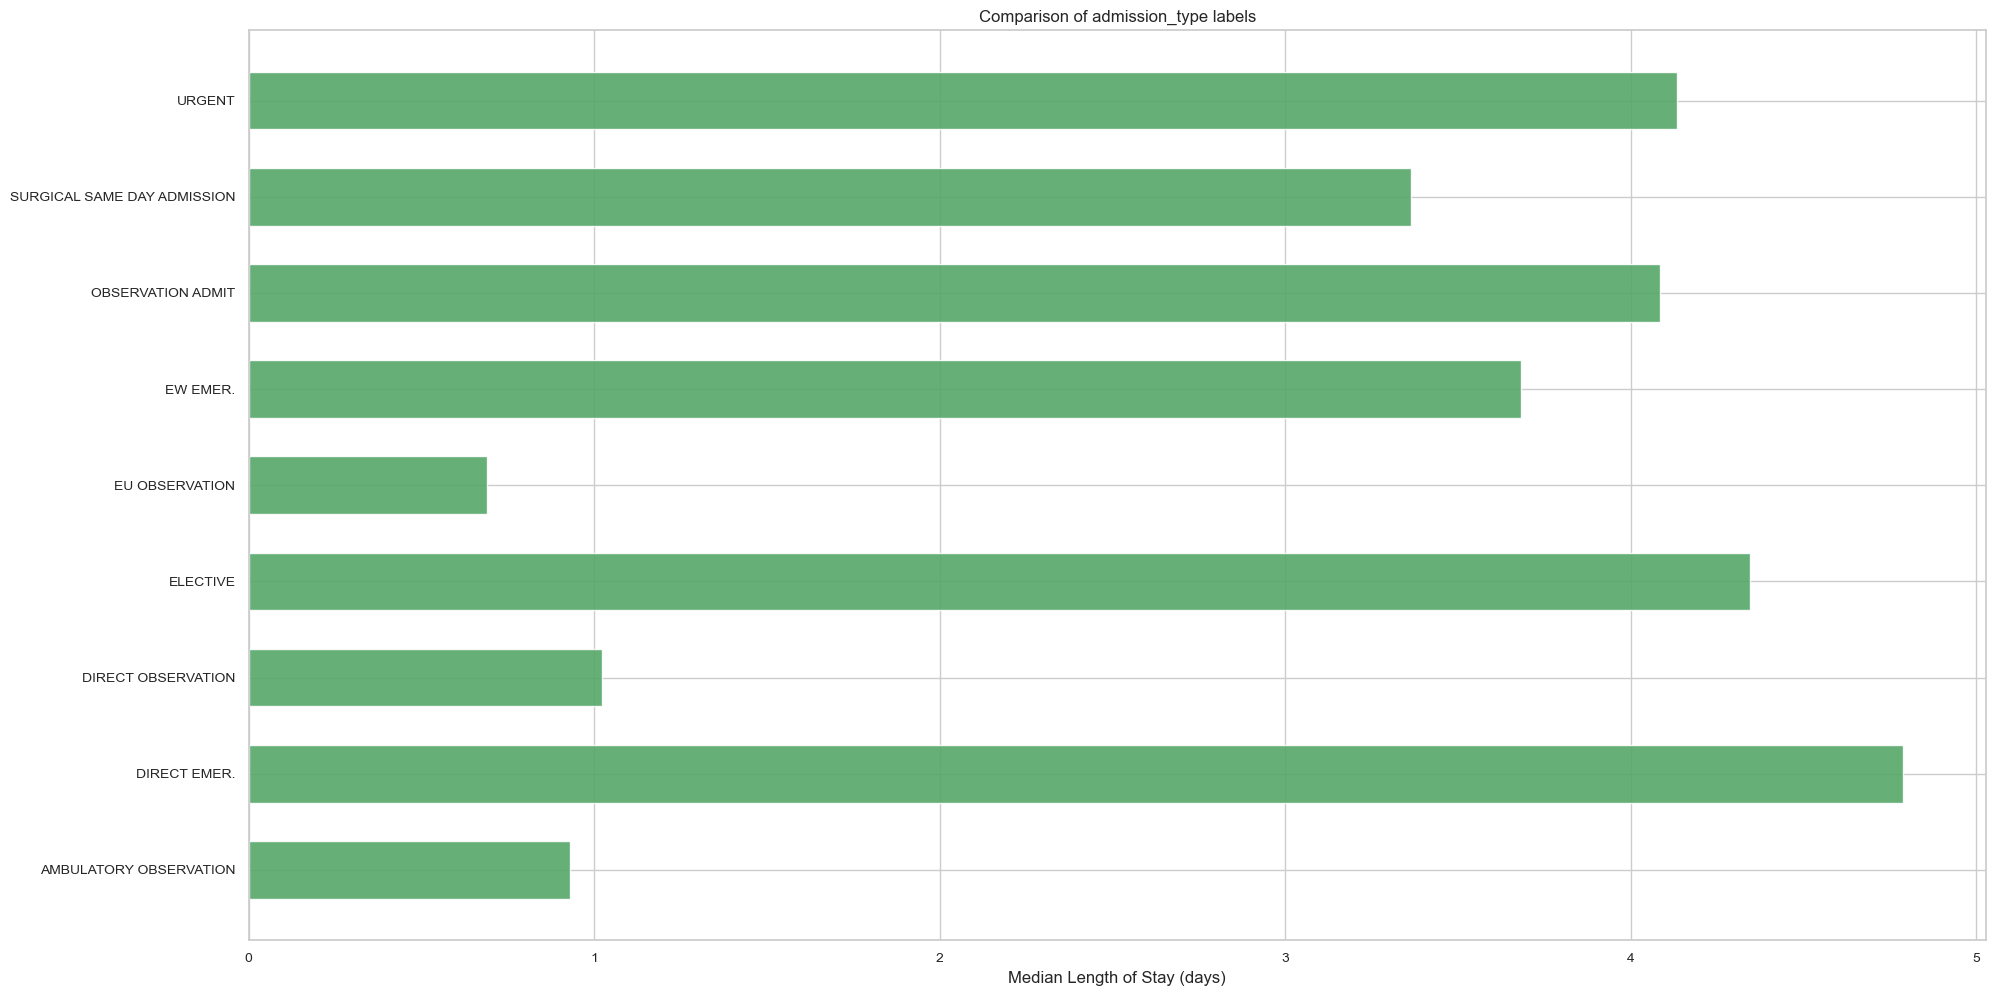

In [88]:
plot_los_groupby('admission_type')

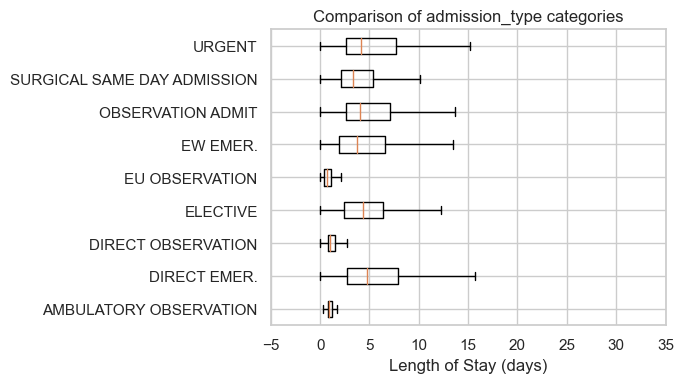

In [62]:
boxplot_los_groupby('admission_type', los_range=(-5, 35), size=(7, 4))

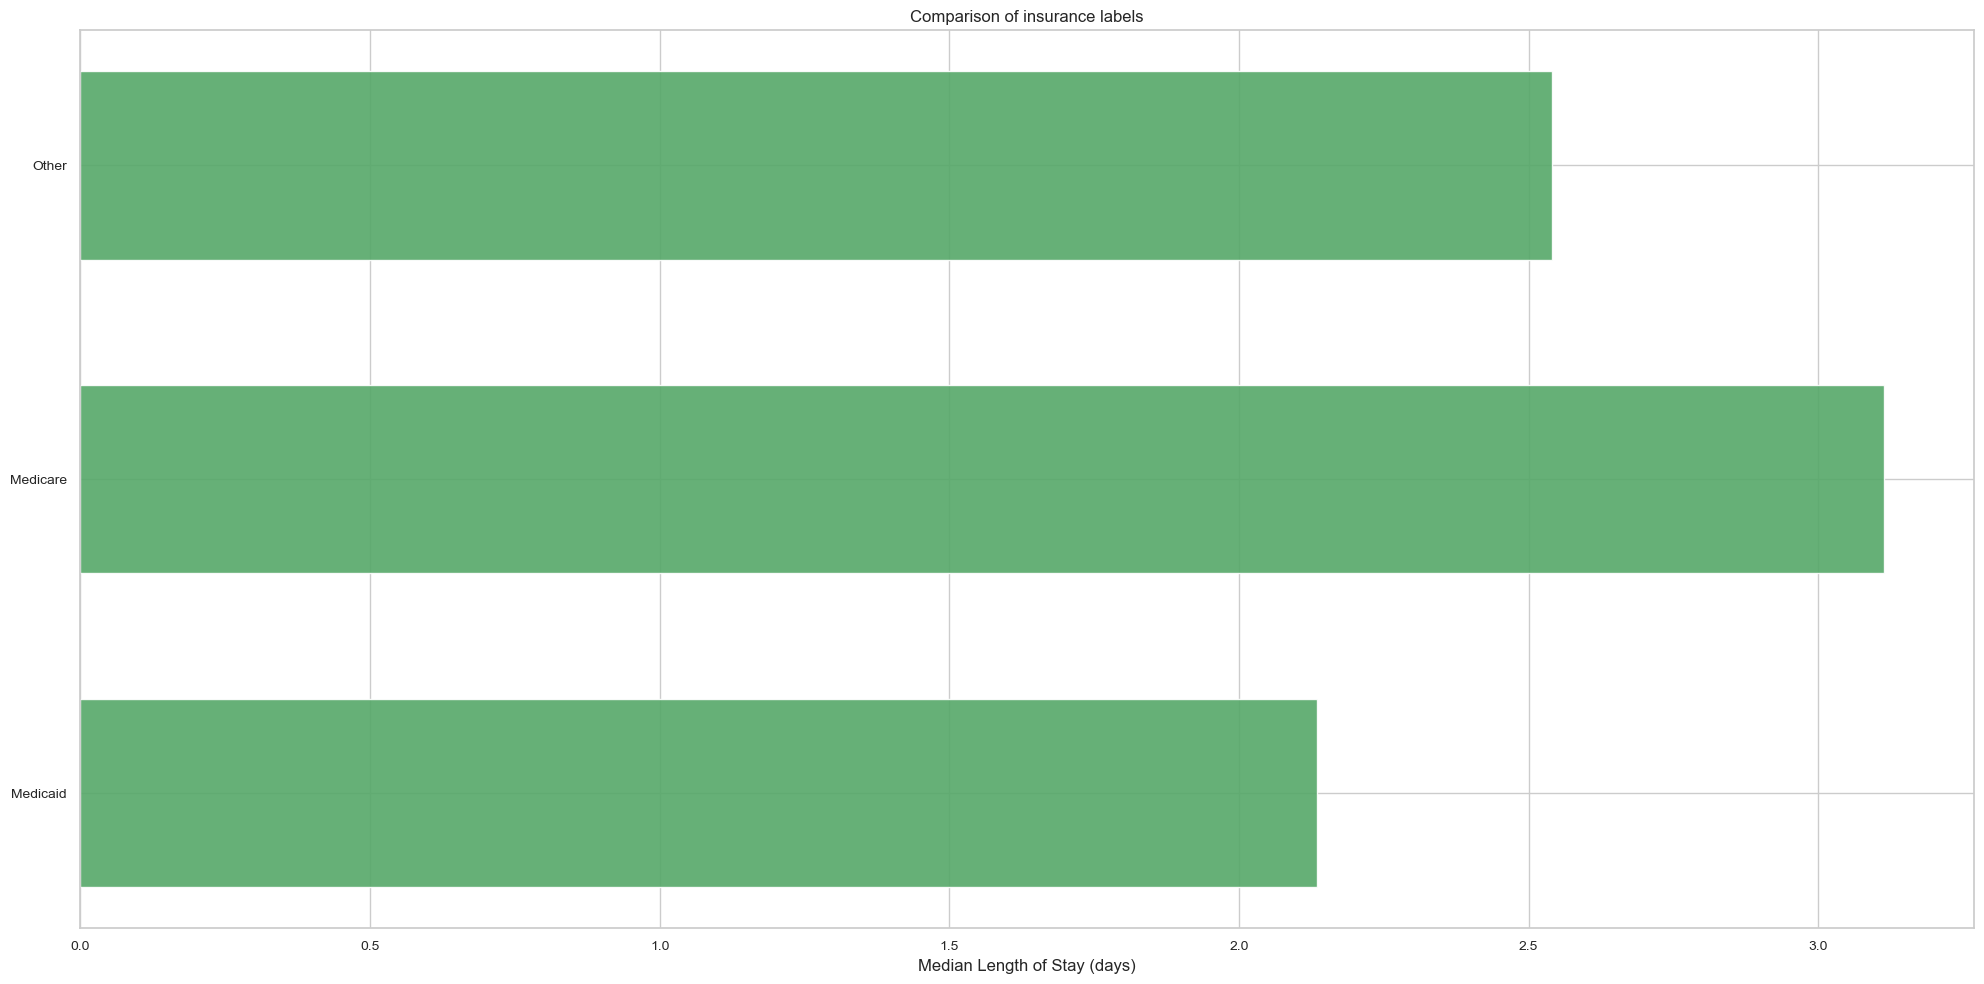

In [92]:
plot_los_groupby('insurance')

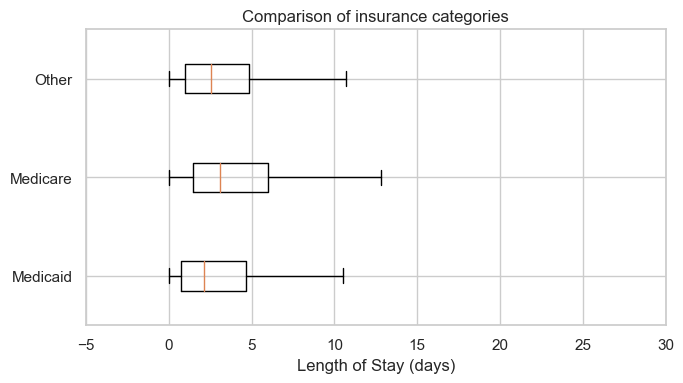

In [64]:
boxplot_los_groupby('insurance', los_range=(-5, 30), size=(7, 4))

Medicare is for an older population and has a higher median than medicaid. Is there a correlation between age and LOS?

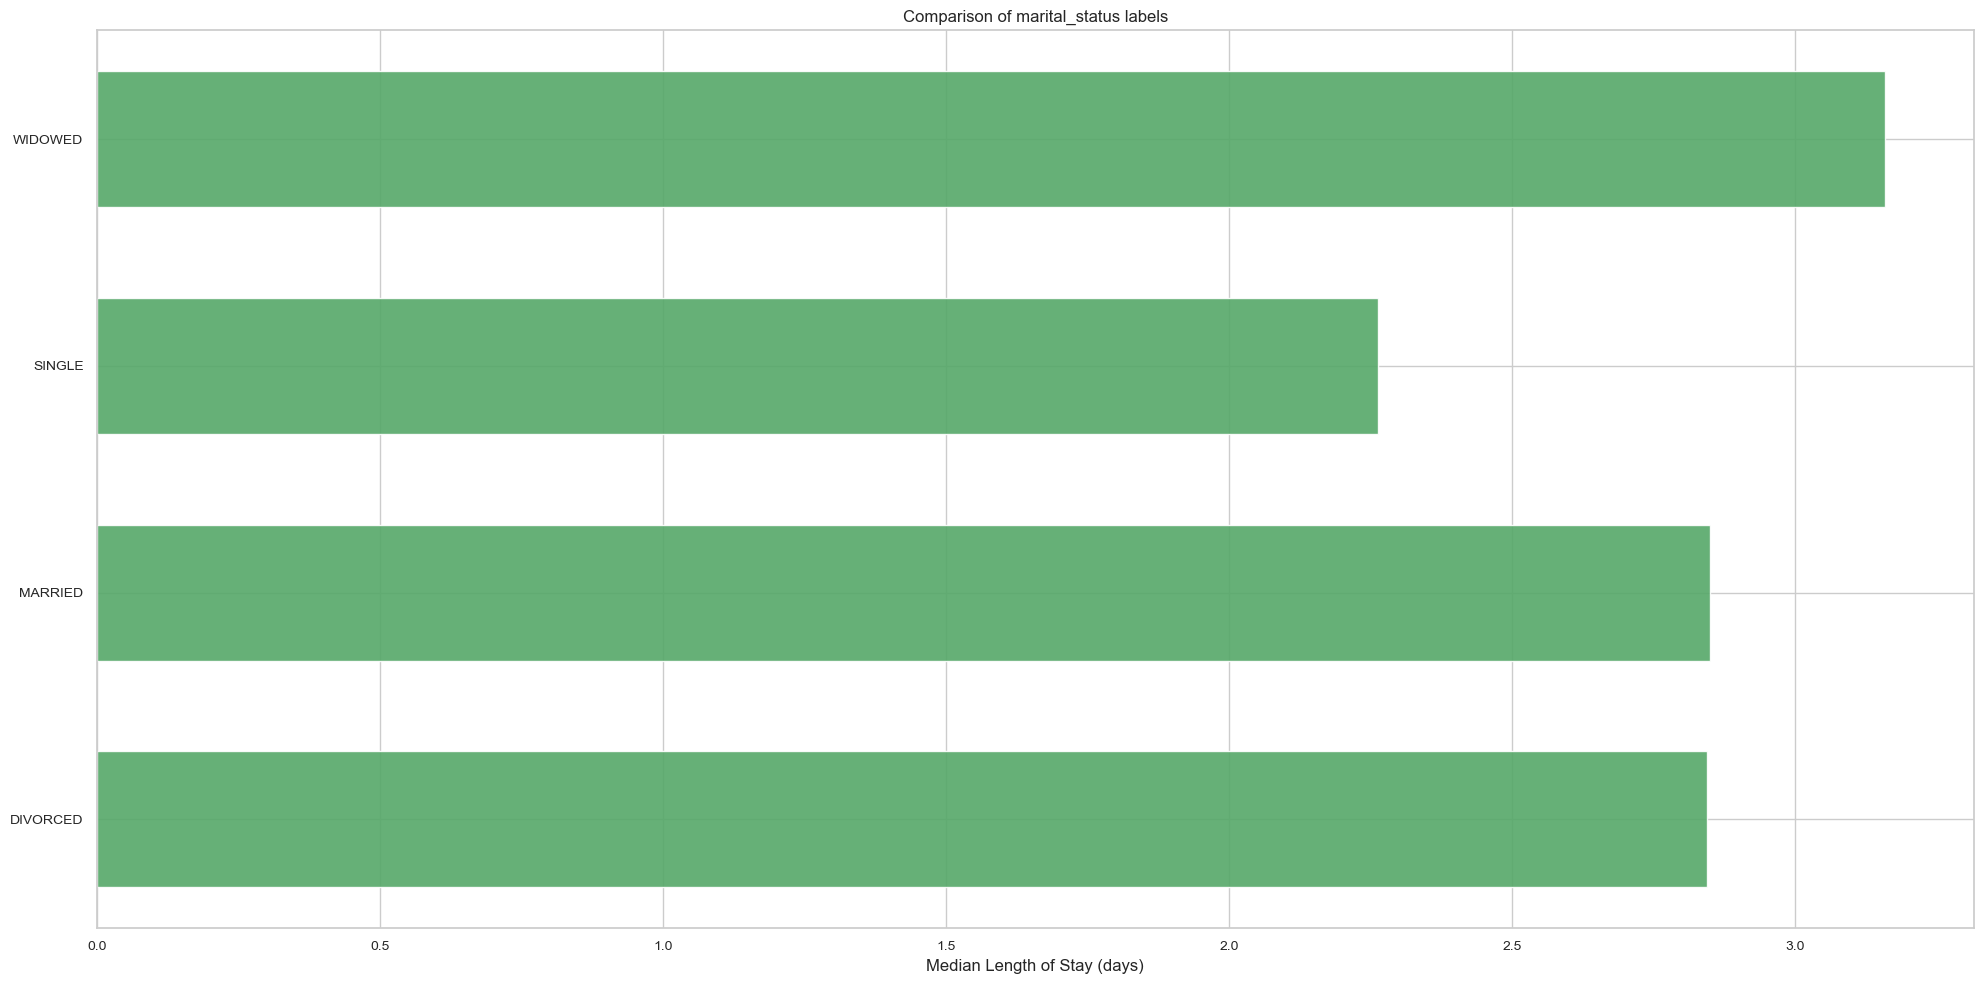

In [93]:
plot_los_groupby('marital_status')

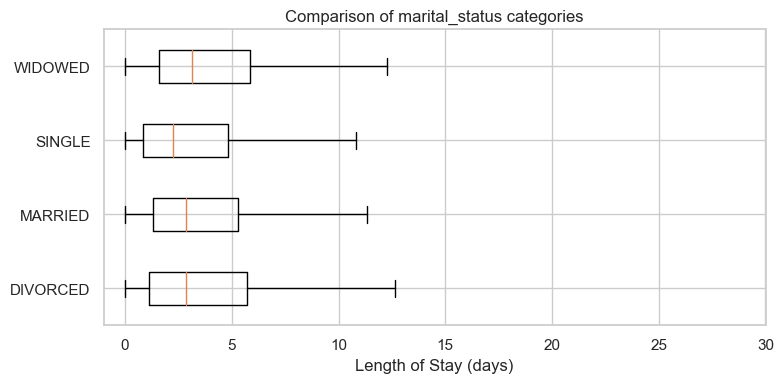

In [66]:
boxplot_los_groupby('marital_status')

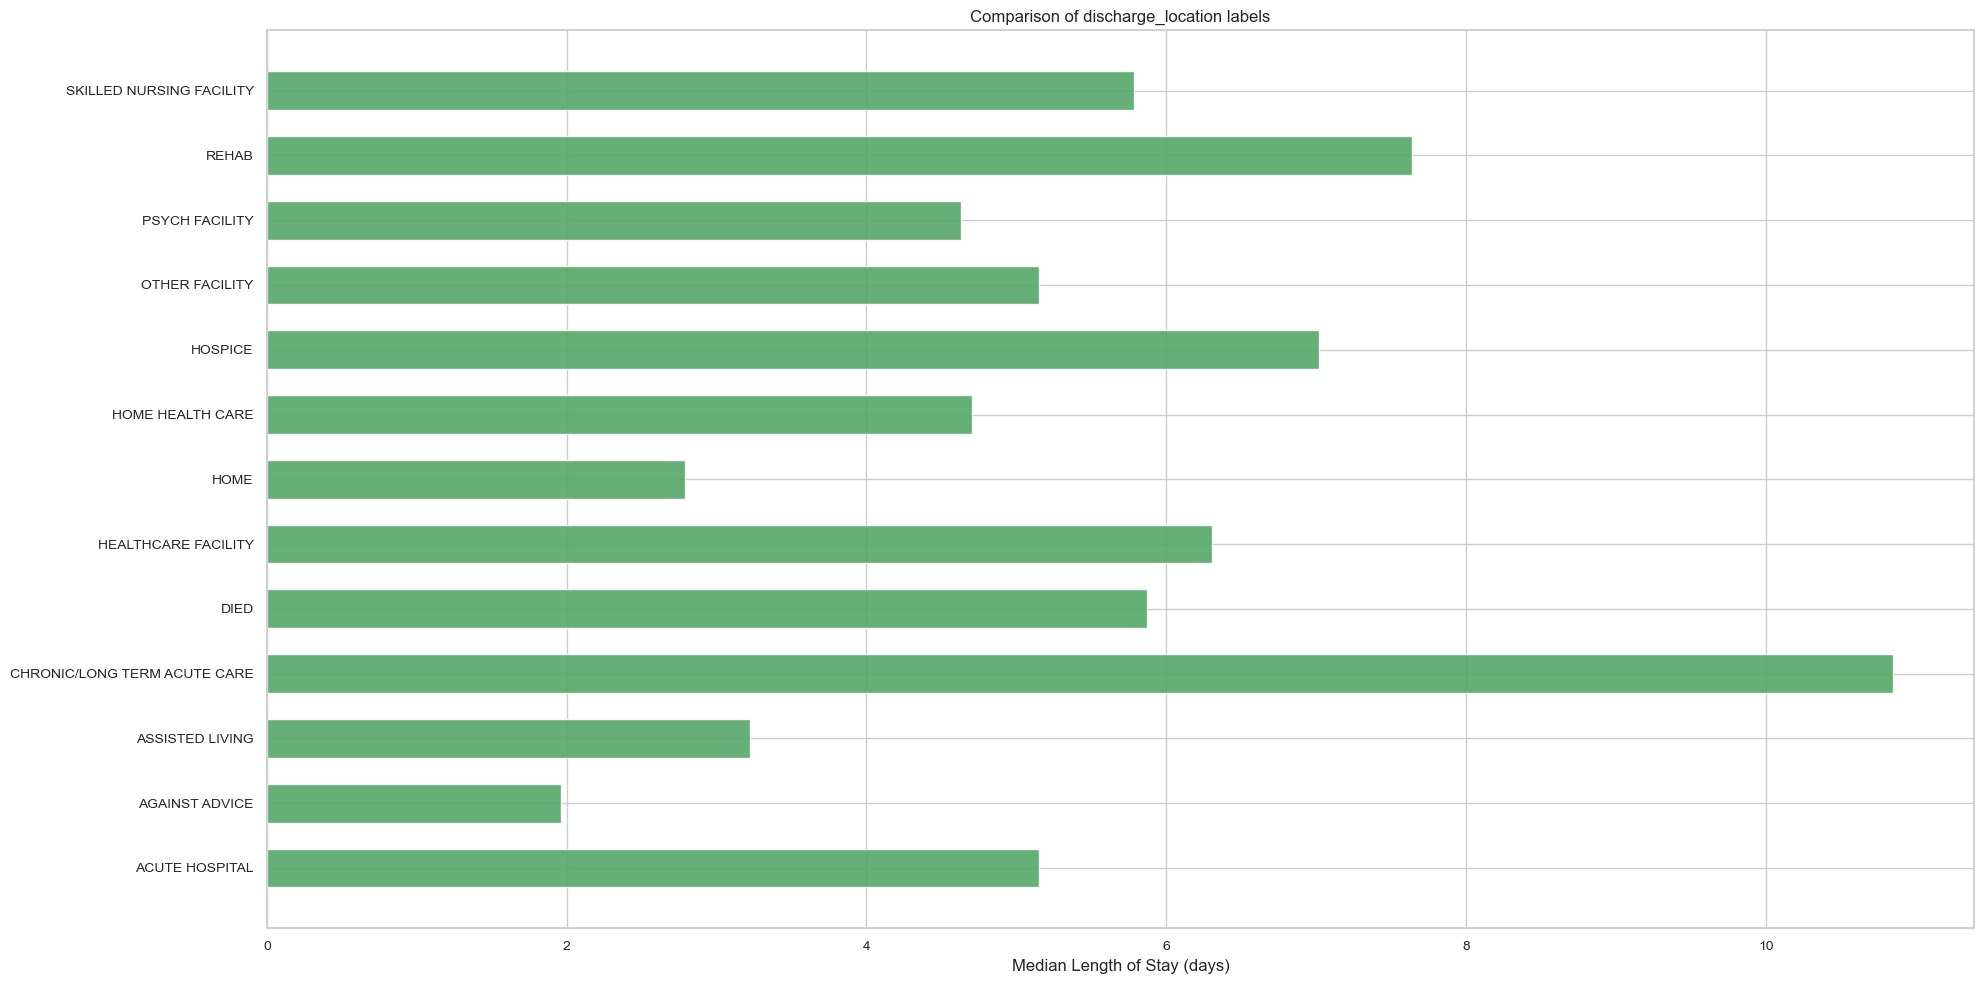

In [94]:
plot_los_groupby('discharge_location')

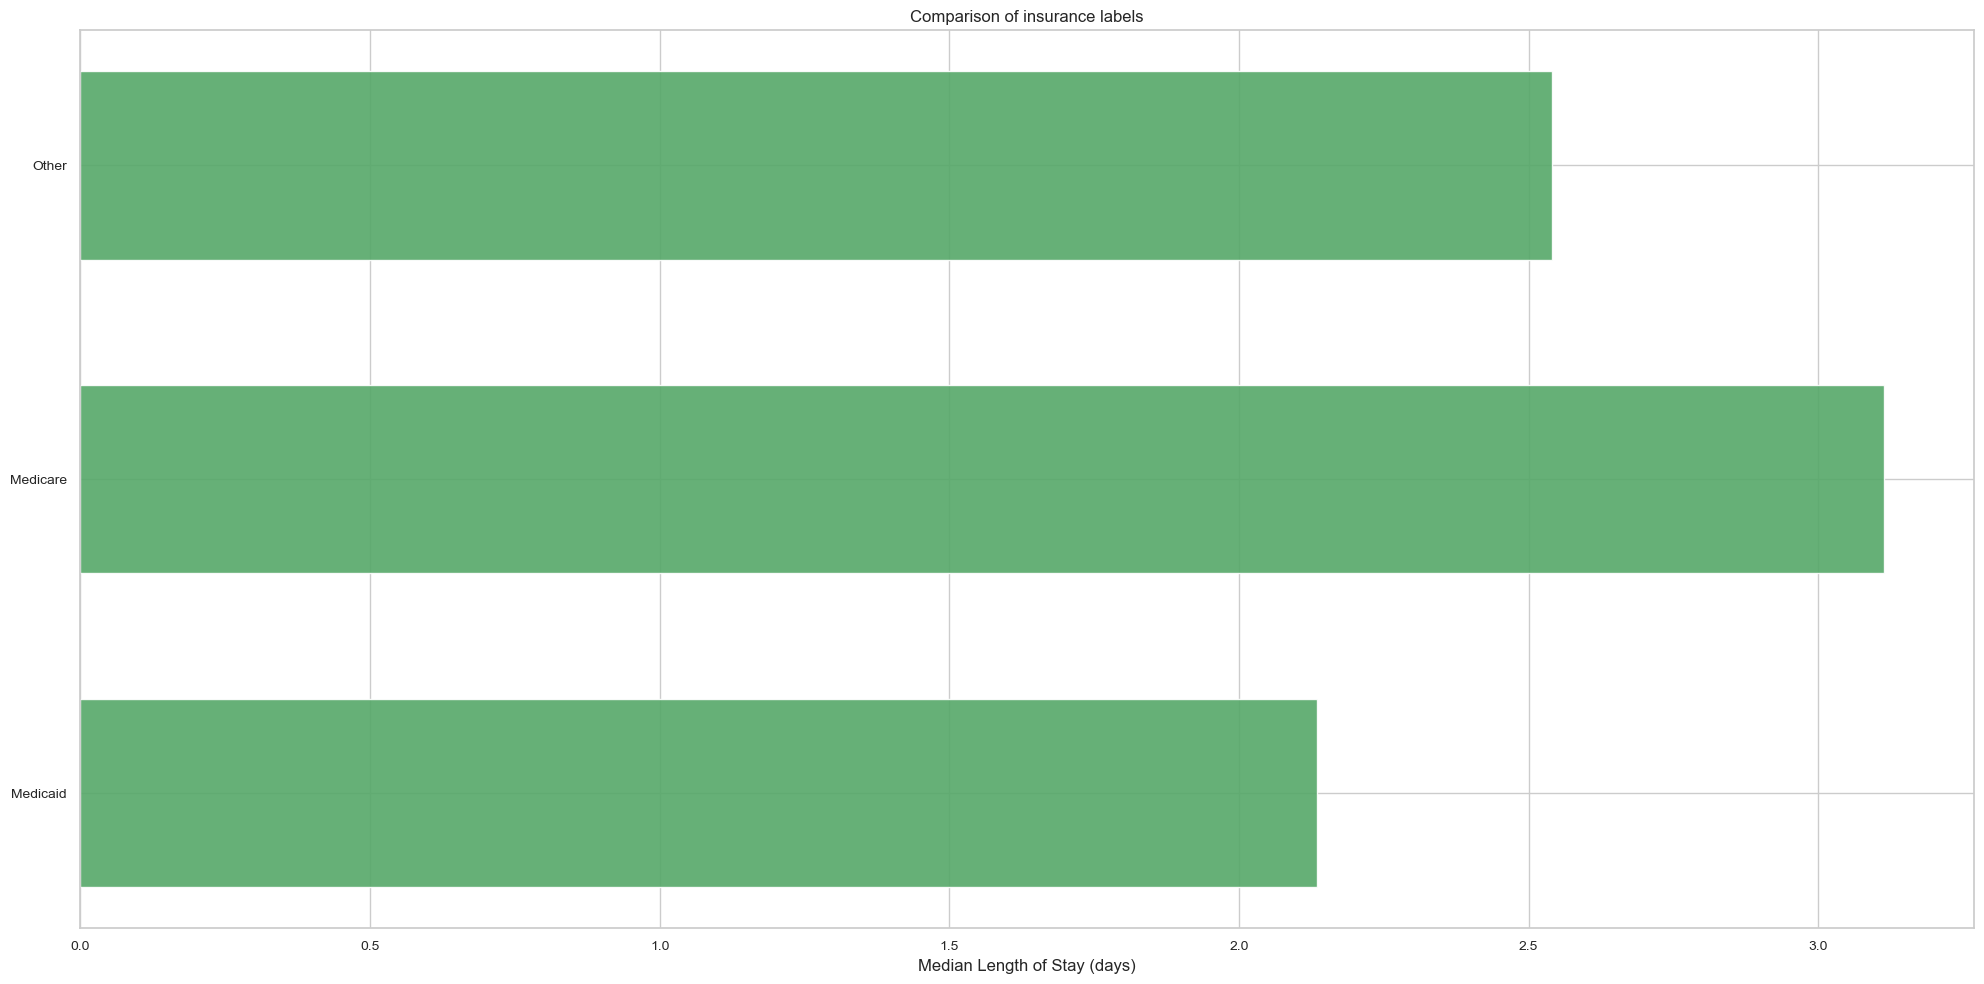

In [95]:
plot_los_groupby('insurance')

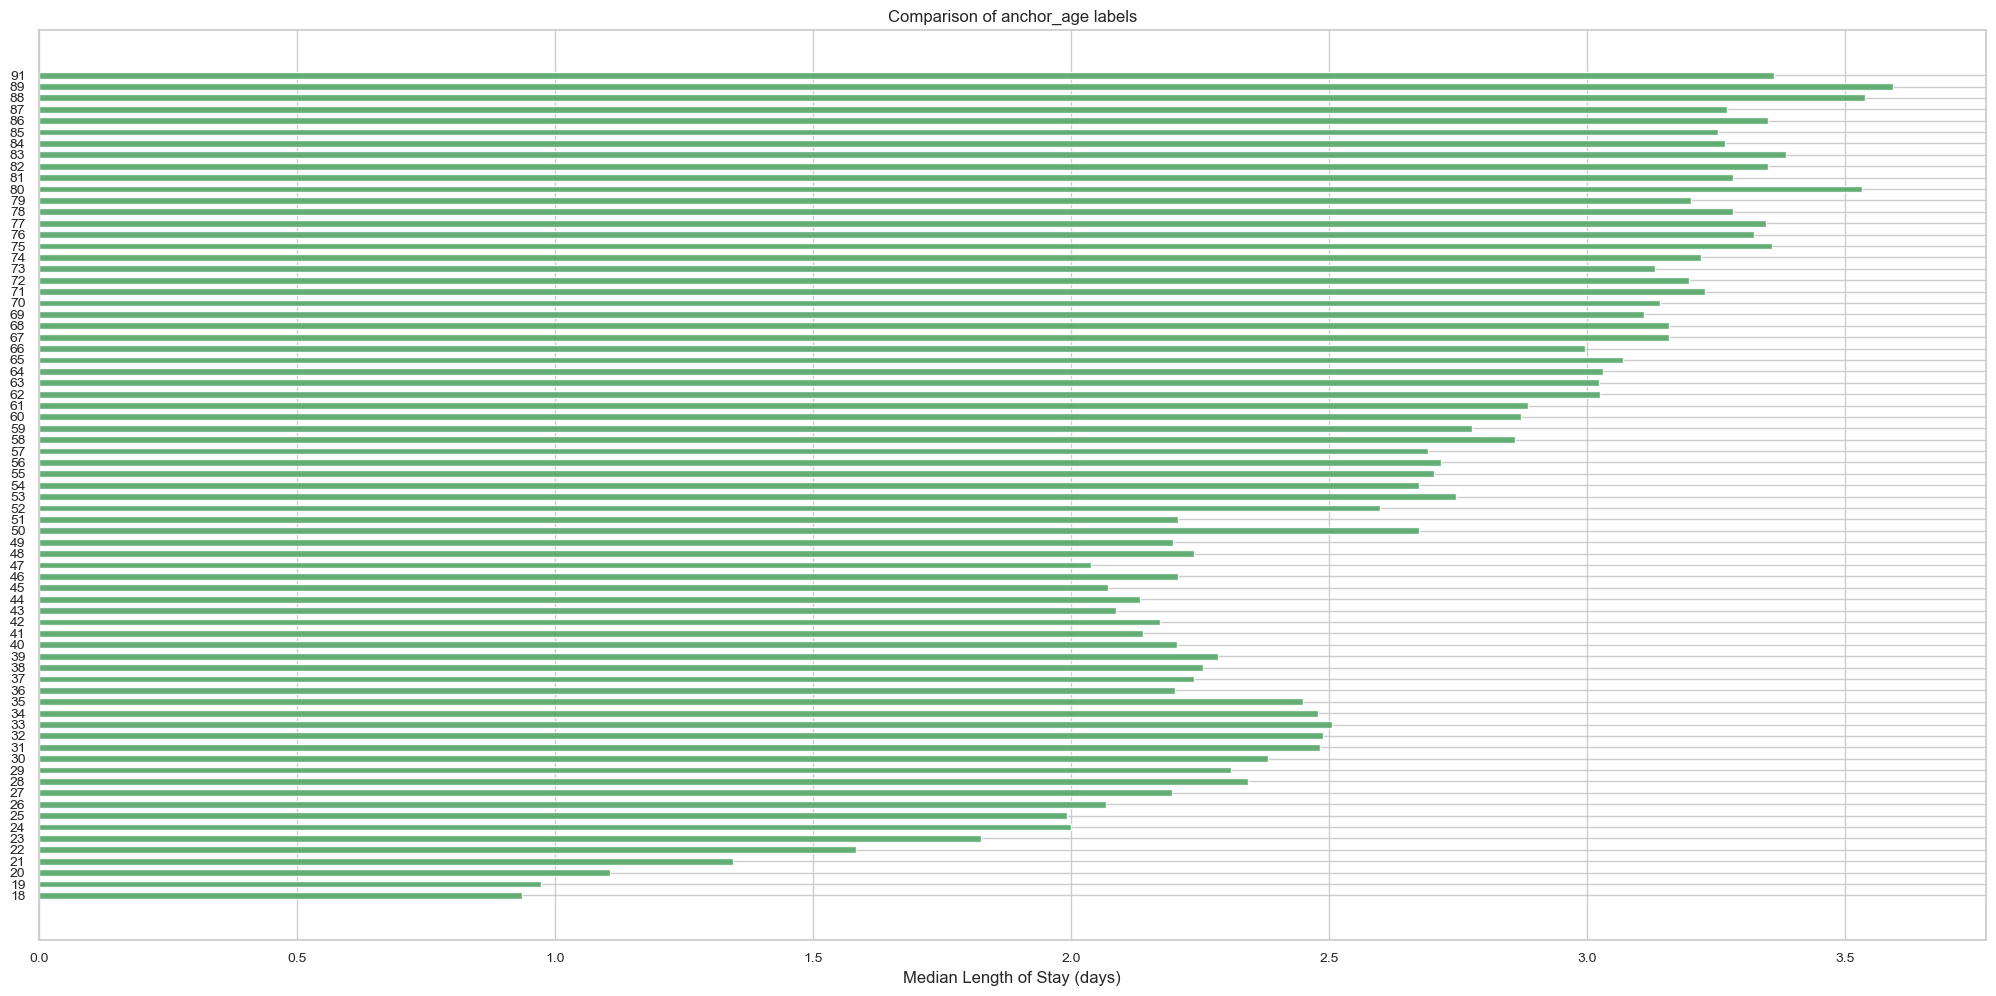

In [90]:
plot_los_groupby('anchor_age')

LOS increases with age.

In [40]:
icd_LOS.head()

,hadm_id,seq_num,icd_code,icd_version,LOS
0,22595853,1,5723,9,0.786111
1,22595853,2,78959,9,0.786111
2,22595853,3,5715,9,0.786111
3,22595853,4,07070,9,0.786111
4,22595853,5,496,9,0.786111


In [41]:
icd_LOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755063 entries, 0 to 4755062
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   hadm_id      int64  
 1   seq_num      int64  
 2   icd_code     object 
 3   icd_version  int64  
 4   LOS          float64
dtypes: float64(1), int64(3), object(1)
memory usage: 181.4+ MB


In [42]:
print(icd_LOS['icd_code'].unique(), len(icd_LOS['icd_code'].unique()))

['5723' '78959' '5715' ... 'H353131' 'K8036' 'O359XX2'] 25805


In [43]:
print(icd_LOS['icd_version'].value_counts())

9     2766010
10    1989053
Name: icd_version, dtype: int64


In [44]:
icd9_LOS = icd_LOS.loc[(icd_LOS['icd_version'] == 9)]

In [45]:
icd9_LOS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2766010 entries, 0 to 4755062
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   hadm_id      int64  
 1   seq_num      int64  
 2   icd_code     object 
 3   icd_version  int64  
 4   LOS          float64
dtypes: float64(1), int64(3), object(1)
memory usage: 126.6+ MB


In [46]:
icd10_LOS = icd_LOS.loc[(icd_LOS['icd_version'] == 10)]

In [47]:
icd10_LOS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989053 entries, 40 to 4755032
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   hadm_id      int64  
 1   seq_num      int64  
 2   icd_code     object 
 3   icd_version  int64  
 4   LOS          float64
dtypes: float64(1), int64(3), object(1)
memory usage: 91.1+ MB


Separated icd_LOS df to prevent over-analysis of similar diagnoses based on overlap in definition of same diagnosis.

In [48]:
# Filter out E and V codes since processing will be done on the numeric first 3 values
icd_LOS['recode'] = icd_LOS['icd_code'][icd_LOS['icd_version'] == 9]
icd_LOS['recode'] = icd_LOS['recode'][~icd_LOS['recode'].str.contains("[a-zA-Z]").fillna(False)]
icd_LOS['recode'].fillna(value='999', inplace=True)

In [49]:
icd_LOS['recode'] = icd_LOS['recode'].str.slice(start=0, stop=3, step=1)
icd_LOS['recode'] = icd_LOS['recode'].astype(int)

In [50]:
# ICD-9 Main Category ranges
icd9_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]

# Associated category names
diag_dict = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',
             4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
             8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin', 
             12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury', 17: 'misc'}

# Re-code in terms of integer
for num, cat_range in enumerate(icd9_ranges):
    icd_LOS['recode'] = np.where(icd_LOS['recode'].between(cat_range[0],cat_range[1]), 
            num, icd_LOS['recode'])
    
# Convert integer to category name using diag_dict
icd_LOS['recode'] = icd_LOS['recode']
icd_LOS['cat'] = icd_LOS['recode'].replace(diag_dict)

In [51]:
# Create list of diagnoses for each admission
hadm_list = icd_LOS.groupby('hadm_id')['cat'].apply(list).reset_index()

In [52]:
# Convert diagnoses list into hospital admission-item matrix
hadm_item = pd.get_dummies(hadm_list['cat'].apply(pd.Series).stack()).sum(level=0)

/var/folders/l_/1836fmns64nf04h6hlglnlgh0000gn/T/ipykernel_75090/29171042.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  hadm_item = pd.get_dummies(hadm_list['cat'].apply(pd.Series).stack()).sum(level=0)


In [53]:
# Join the above created dataset using hadm_id to the hadm_list
hadm_item = hadm_item.join(hadm_list['hadm_id'], how="outer")

In [54]:
# Finally merging with main admissions df
pat_ad = pat_ad.merge(hadm_item, how='inner', on='hadm_id')

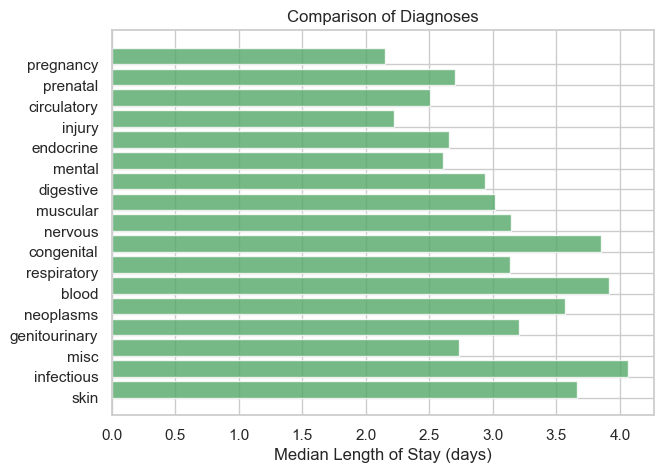

In [91]:
# Explore median LOS by diagnosis category as defined above
diag_cat_list = ['skin', 'infectious',  'misc', 'genitourinary', 'neoplasms', 'blood', 'respiratory', 
                 'congenital','nervous', 'muscular', 'digestive', 'mental', 'endocrine', 'injury',
                 'circulatory', 'prenatal',  'pregnancy']

results = []
for variable in diag_cat_list:
    results.append(pat_ad[[variable, 'LOS']].groupby(variable).median().reset_index().values[1][1])

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge', color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(diag_cat_list)
ax.set_xlabel('Median Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Diagnoses'.format(variable))
plt.show();

In [56]:
pat_ad.head().T

,0,1,2,3,4
subject_id,10000032,10000032,10000032,10000032,10000068
hadm_id,22595853,22841357,25742920,29079034,25022803
admission_type,URGENT,EW EMER.,EW EMER.,EW EMER.,EU OBSERVATION
admit_provider_id,P874LG,P09Q6Y,P60CC5,P30KEH,P51VDL
admission_location,TRANSFER FROM HOSPITAL,EMERGENCY ROOM,EMERGENCY ROOM,EMERGENCY ROOM,EMERGENCY ROOM
discharge_location,HOME,HOME,HOSPICE,HOME,NaN
insurance,Other,Medicaid,Medicaid,Medicaid,Other
language,ENGLISH,ENGLISH,ENGLISH,ENGLISH,ENGLISH
marital_status,WIDOWED,WIDOWED,WIDOWED,WIDOWED,SINGLE
race,WHITE,WHITE,WHITE,WHITE,WHITE


In [57]:
df = pat_ad.drop(columns=['admission_location','subject_id', 'ADMITTIME', 'DISCHTIME', 'EDOUTTIME', 'EDREGTIME',
                'discharge_location', 'language',
                'hospital_expire_flag',  'DOD', 'admit_provider_id', 'hadm_id'], axis=1, inplace=False)

In [58]:
df.head().T

,0,1,2,3,4
admission_type,URGENT,EW EMER.,EW EMER.,EW EMER.,EU OBSERVATION
insurance,Other,Medicaid,Medicaid,Medicaid,Other
marital_status,WIDOWED,WIDOWED,WIDOWED,WIDOWED,SINGLE
race,WHITE,WHITE,WHITE,WHITE,WHITE
LOS,0.786111,1.015278,1.754167,2.222222,0.298611
gender,F,F,F,F,F
anchor_age,52,52,52,52,19
blood,0,1,0,0,0
circulatory,0,0,0,1,0
congenital,0,0,0,0,0
